### 모듈 및 데이터 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('Mall_Customers.csv', index_col=0)

### 데이터 특성 확인

In [6]:
data.shape

(200, 4)

In [7]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [9]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [10]:
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

In [31]:
data

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,label
CustomerID,,,,,
1,19,15,39,1,1
2,21,15,81,1,3
3,20,16,6,0,1
4,23,16,77,0,3
5,31,17,40,0,1
...,...,...,...,...,...
196,35,120,79,0,4
197,45,126,28,0,2
198,32,126,74,1,4


### KMeans Clustering Modeling

In [11]:
from sklearn.cluster import KMeans

In [12]:
model = KMeans(n_clusters=3)

In [13]:
model.fit(data)

KMeans(n_clusters=3)

In [14]:
#분류된 것 확인
model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [15]:
result_df = data.copy()

In [16]:
result_df['label'] = model.labels_

In [17]:
result_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,label
CustomerID,,,,,
1,19,15,39,1,2
2,21,15,81,1,2
3,20,16,6,0,2
4,23,16,77,0,2
5,31,17,40,0,2


### groupby를 통해 각 클러스터별 통계량 확인

In [18]:
result_df.groupby('label').mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
label,,,,
0,32.692308,86.538462,82.128205,0.461538
1,40.394737,87.000000,18.631579,0.526316
2,40.325203,44.154472,49.829268,0.406504


### cluster별 관측치 갯수

In [19]:
result_df['label'].value_counts()

2    123
0     39
1     38
Name: label, dtype: int64

### Elbow method

In [20]:
distance = []
for i in range(2,11):
    model = KMeans(n_clusters=i)
    model.fit(data)
    distance.append(model.inertia_)

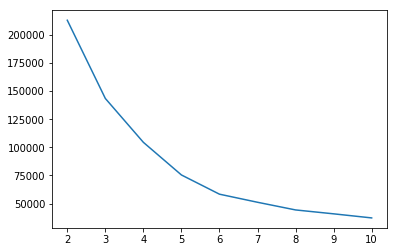

In [21]:
sns.lineplot(x=list(range(2,11)), y=distance)

-> elbow method가 완만해서 판단이 애매할 땐 silhotte score 사용

In [22]:
from sklearn.metrics import silhouette_score

In [23]:
silhouette_score(data, model.labels_)

0.383184564192097

In [24]:
sil = []
for i in range(2,11):
    model = KMeans(n_clusters=i)
    model.fit(data)
    sil.append(silhouette_score(data, model.labels_))

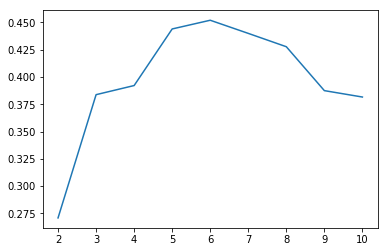

In [25]:
#높을수록 좋음
#id를 안 뺴서 이렇게 생긴 듯
sns.lineplot(x=list(range(2,11)), y=sil)

In [27]:
model = KMeans(n_clusters=5)
model.fit(data)
data['label'] = model.labels_

In [28]:
data.groupby('label').mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
label,,,,
0,43.088608,55.291139,49.569620,0.417722
1,45.217391,26.304348,20.913043,0.391304
2,40.666667,87.750000,17.583333,0.527778
3,25.521739,26.304348,78.565217,0.391304
4,32.692308,86.538462,82.128205,0.461538


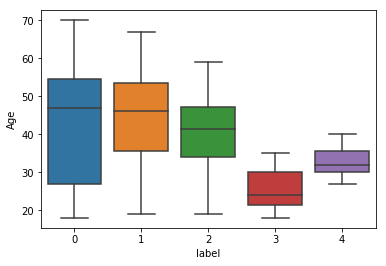

In [29]:
sns.boxplot(x='label',y='Age',data=data)

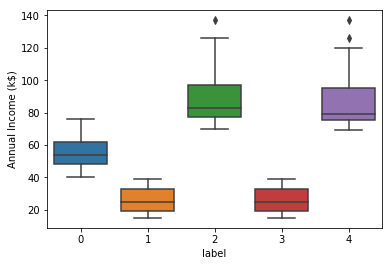

In [30]:
sns.boxplot(x='label', y='Annual Income (k$)', data=data)

### PCA를 활용한 변수를 중리고 scatter plot그리기

In [52]:
data.drop('label', axis=1, inplace=True)

In [53]:
from sklearn.decomposition import PCA

In [54]:
#n_components : 몇개로 줄일거냐
pca = PCA(n_components=2)

In [55]:
pca.fit(data)
pca_df = pca.transform(data)

In [56]:
pca_df

array([[-1.09383941e+02,  5.47845404e+00],
       [-1.08202857e+02, -3.49317649e+01],
       [-1.07376292e+02,  3.78408717e+01],
       [-1.06007807e+02, -3.05626965e+01],
       [-1.04980323e+02,  7.29674715e+00],
       [-1.03774723e+02, -2.98012381e+01],
       [-1.02996481e+02,  4.13227699e+01],
       [-1.01426745e+02, -4.70713035e+01],
       [-1.00952191e+02,  5.09237382e+01],
       [-9.93805223e+01, -2.40346077e+01],
       [-9.90706564e+01,  4.09178725e+01],
       [-9.74040858e+01, -4.91523683e+01],
       [-9.67777825e+01,  3.78938689e+01],
       [-9.52523148e+01, -3.02508027e+01],
       [-9.48417033e+01,  3.50274282e+01],
       [-9.34009908e+01, -3.26452221e+01],
       [-9.24499251e+01,  1.31741290e+01],
       [-9.12420152e+01, -2.04349779e+01],
       [-8.99471970e+01,  2.29456992e+01],
       [-8.84752130e+01, -4.81072460e+01],
       [-8.75736418e+01,  1.32190190e+01],
       [-8.63488497e+01, -2.60551150e+01],
       [-8.56046385e+01,  4.49591024e+01],
       [-8.

In [57]:
pca_df = pd.DataFrame(pca_df, columns=['PC1', 'PC2'])

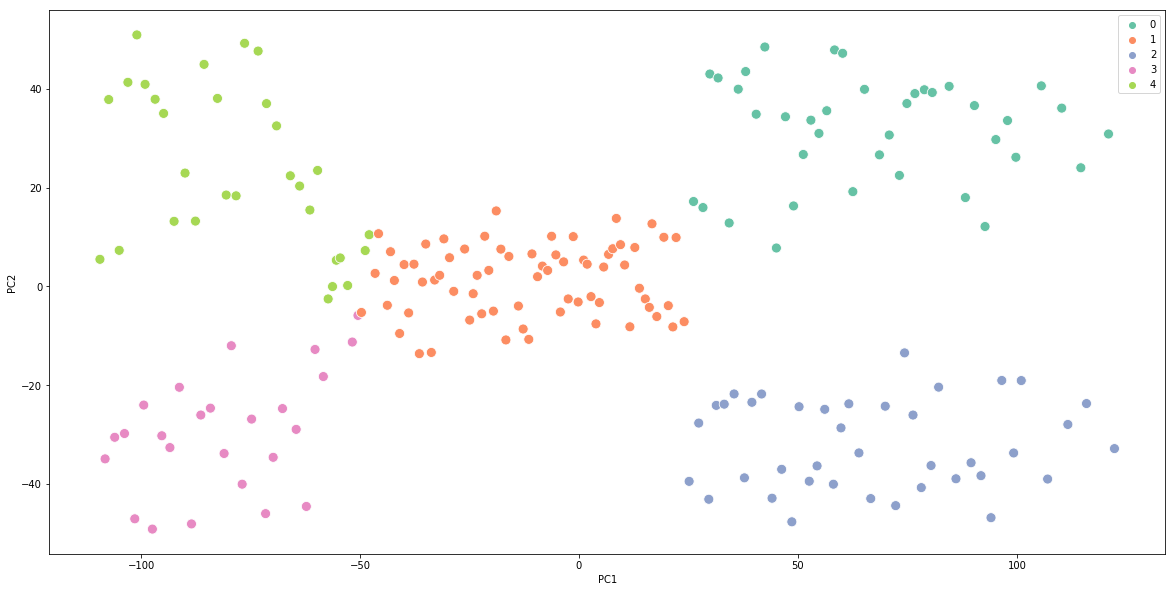

In [60]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=model.labels_, palette='Set2', s=100)